In [1]:
# standard imports
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# specify the root dir
DIR = os.getcwd()
DIR

'/media/suyash/DATA DRIVE 2/dog_breed'

In [3]:
# read in the csv file containing file-names and the corresponding label
df = pd.read_csv("labels.csv")
df["id"] = [f"{name}.jpg" for name in df["id"]] # add the extension od the files to add the end of the file-names
df.head() # take a look at the dataset

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


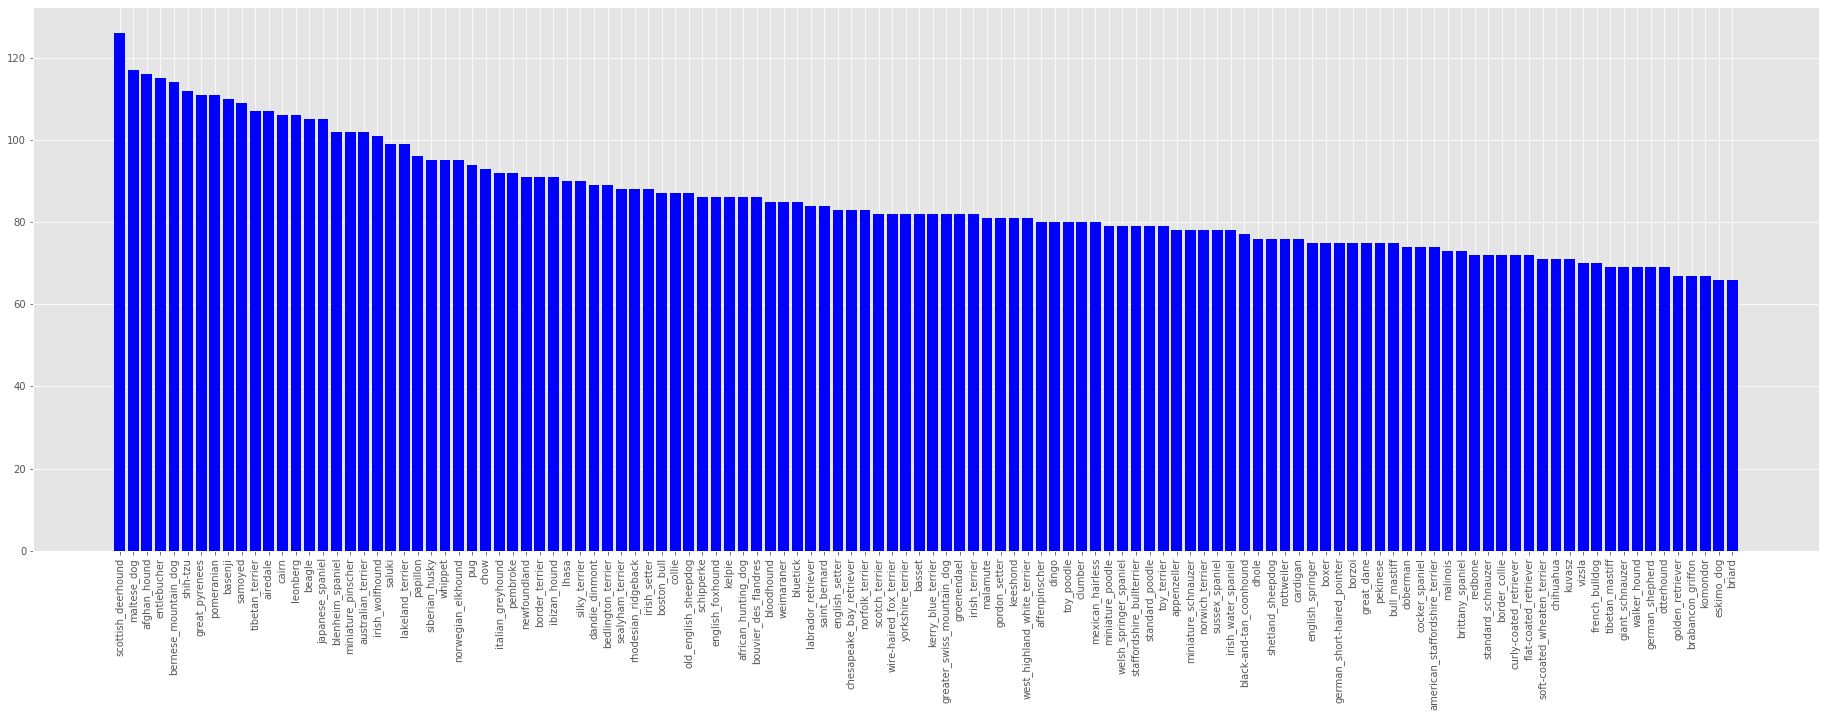

In [4]:
# plot out the statics of the dataframe: no. of images given corresponding to each class
plt.style.use("ggplot")
df_counts = dict(df["breed"].value_counts()) # dictionary of different breeds and their value counts
plt.figure(figsize=(32, 10))
plt.bar(df_counts.keys(), df_counts.values(), color="b")
plt.xticks(rotation=90);

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_train, df_test_full = train_test_split(df, stratify=df["breed"], test_size=0.2, random_state=42)

df_test, df_val = train_test_split(df_test_full, stratify=df_test_full["breed"], test_size=0.5, random_state=42)


df_test.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [7]:
df_train.head()

,id,breed
0,2f812a0cb6977bbad1a167e1ef4ae2ac.jpg,gordon_setter
1,123c19c8d168e7704273cb7174351821.jpg,vizsla
2,396ef6a16b8640e1e5b69f872540776f.jpg,australian_terrier
3,5f14fac852ee51524997243f086e4ea2.jpg,norwich_terrier
4,8463aa43d88bee057082434ccc806bb0.jpg,bernese_mountain_dog


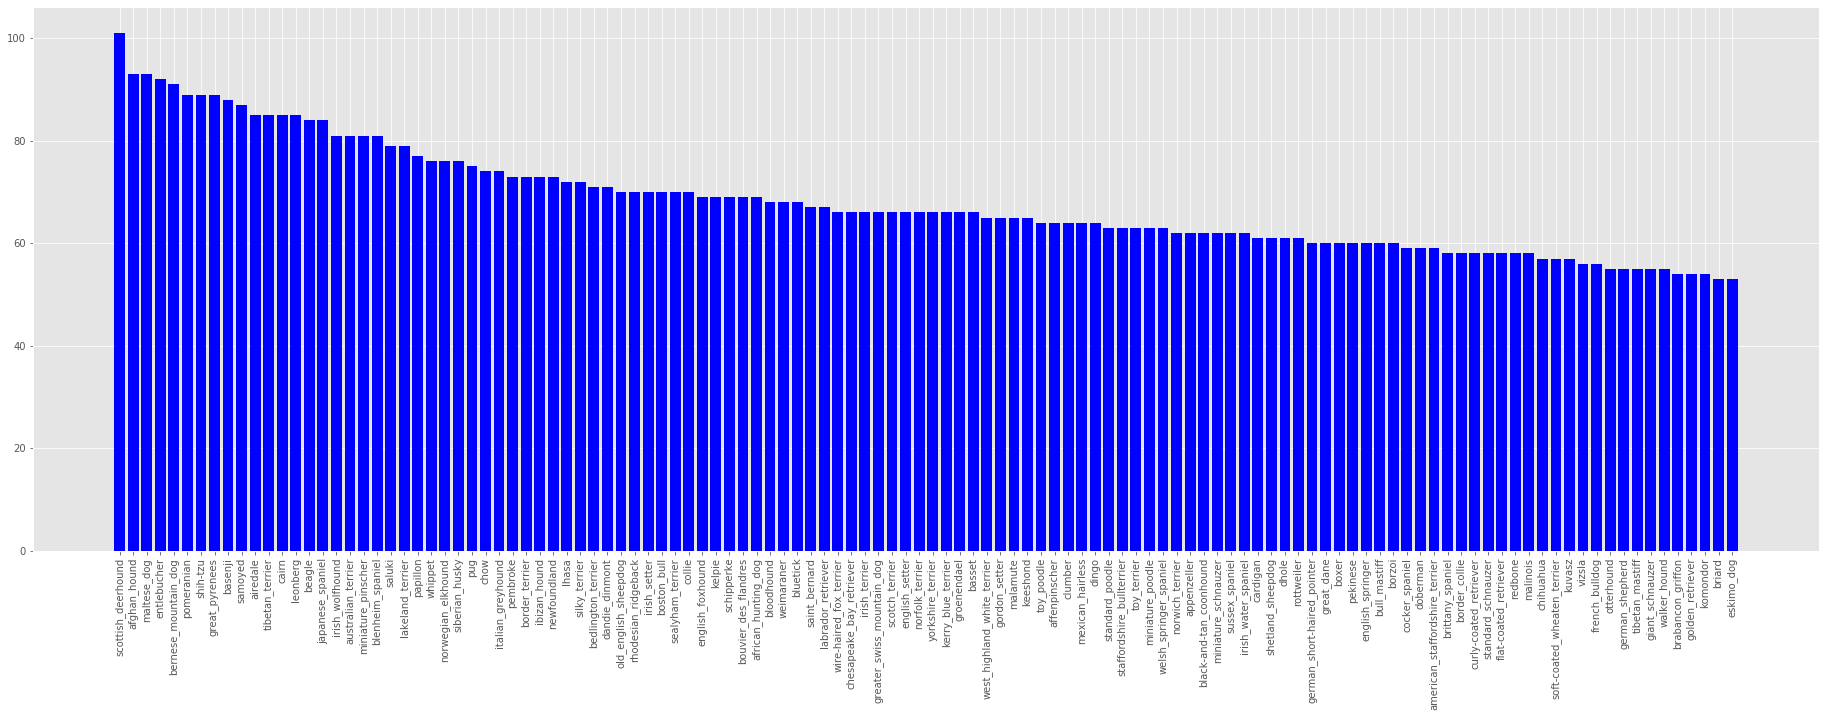

In [8]:
df_counts_train = dict(df_train["breed"].value_counts()) 
plt.figure(figsize=(32, 10))
plt.bar(df_counts_train.keys(), df_counts_train.values(), color="blue")
plt.xticks(rotation=90);

In [9]:

df_val.head()

,id,breed
0,8452a26d7243a299ea782a7ba4036f1f.jpg,samoyed
1,7baa672b0451bb6f944c7d969edb61b6.jpg,ibizan_hound
2,5372ce11fe19b19be54100297154bf77.jpg,rhodesian_ridgeback
3,bf7004de0f825049194139051f7a8025.jpg,scottish_deerhound
4,7e1b9c2578655329d460cc9bebe697e6.jpg,weimaraner


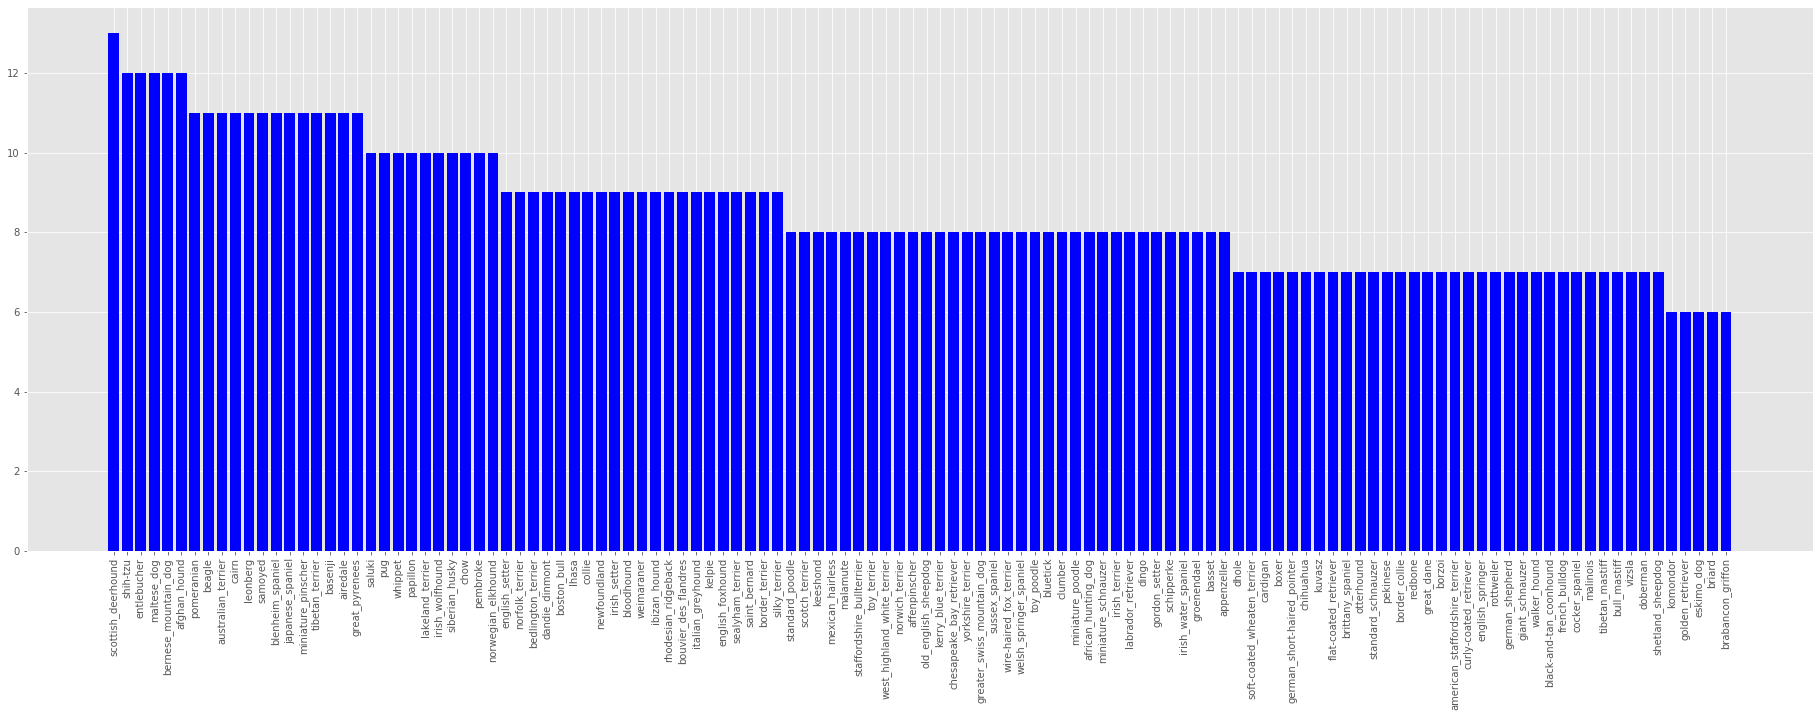

In [10]:
df_counts_val = dict(df_val["breed"].value_counts()) # dictionary of different breeds and their value counts
plt.figure(figsize=(32, 10))
plt.bar(df_counts_val.keys(), df_counts_val.values(), color="blue")
plt.xticks(rotation=90);

In [11]:
df_test.head()

,id,breed
0,03dfefdb2939388f7ca9578cb7c4a2b9.jpg,maltese_dog
1,fa79fd049300f5082393fa99a142cd7f.jpg,sealyham_terrier
2,e97b337794ab4b95db5e2622156de547.jpg,giant_schnauzer
3,21eec2cb15c5b4948605bf5d2c9ab87e.jpg,great_dane
4,84564a69c0d0fa36e0810188943683a1.jpg,tibetan_mastiff


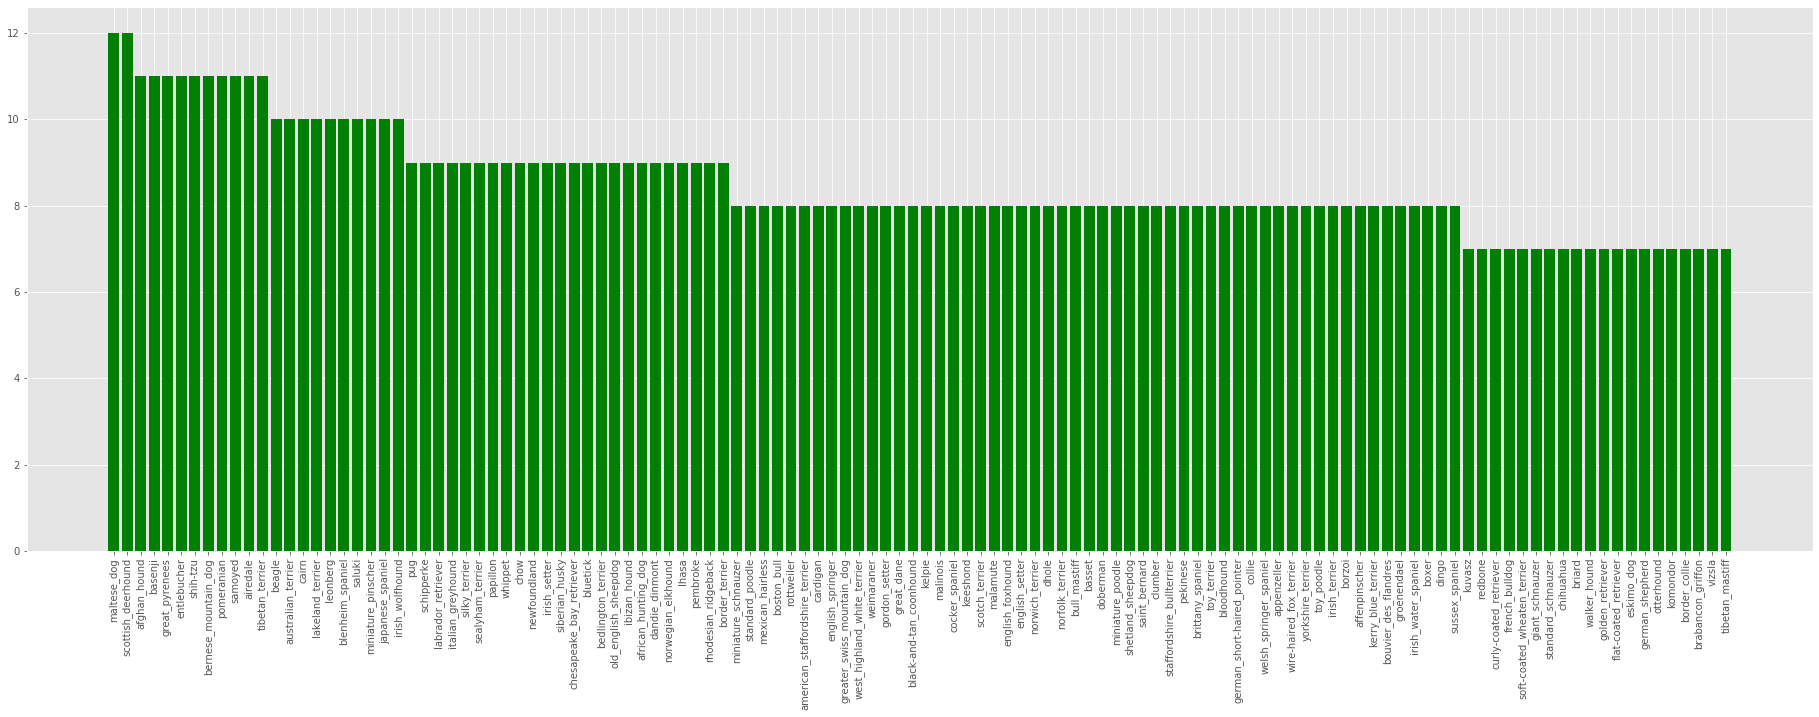

In [11]:
df_counts_test = dict(df_test["breed"].value_counts()) # dictionary of different breeds and their value counts
plt.figure(figsize=(32, 10))
plt.bar(df_counts_test.keys(), df_counts_test.values(), color="green")
plt.xticks(rotation=90);

In [13]:
print("Train dataset : ", df_train.shape)
print("Test dataset : ", df_test.shape)
print("Validation dataset : ", df_val.shape)

Train dataset :  (8177, 2)
Test dataset :  (1022, 2)
Validation dataset :  (1023, 2)


In [14]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
unique_breeds = [breed for breed in df["breed"].unique()]
breeds_processed = le.fit_transform(unique_breeds)

In [16]:
breeds_processed_dict = {unique_breeds[x]:breeds_processed[x] for x in range(len(unique_breeds))}
breeds_processed_dict

{'boston_bull': 19,
 'dingo': 37,
 'pekinese': 85,
 'bluetick': 15,
 'golden_retriever': 49,
 'bedlington_terrier': 10,
 'borzoi': 18,
 'basenji': 7,
 'scottish_deerhound': 97,
 'shetland_sheepdog': 99,
 'walker_hound': 113,
 'maltese_dog': 73,
 'norfolk_terrier': 79,
 'african_hunting_dog': 2,
 'wire-haired_fox_terrier': 118,
 'redbone': 89,
 'lakeland_terrier': 68,
 'boxer': 21,
 'doberman': 38,
 'otterhound': 83,
 'standard_schnauzer': 106,
 'irish_water_spaniel': 58,
 'black-and-tan_coonhound': 12,
 'cairn': 26,
 'affenpinscher': 0,
 'labrador_retriever': 67,
 'ibizan_hound': 55,
 'english_setter': 40,
 'weimaraner': 114,
 'giant_schnauzer': 48,
 'groenendael': 54,
 'dhole': 36,
 'toy_poodle': 110,
 'border_terrier': 17,
 'tibetan_terrier': 109,
 'norwegian_elkhound': 80,
 'shih-tzu': 100,
 'irish_terrier': 57,
 'kuvasz': 66,
 'german_shepherd': 46,
 'greater_swiss_mountain_dog': 53,
 'basset': 8,
 'australian_terrier': 6,
 'schipperke': 95,
 'rhodesian_ridgeback': 90,
 'irish_sett

In [17]:
breeds_processed_id2name = { x:y for y,x in breeds_processed_dict.items()}
breeds_processed_id2name

{19: 'boston_bull',
 37: 'dingo',
 85: 'pekinese',
 15: 'bluetick',
 49: 'golden_retriever',
 10: 'bedlington_terrier',
 18: 'borzoi',
 7: 'basenji',
 97: 'scottish_deerhound',
 99: 'shetland_sheepdog',
 113: 'walker_hound',
 73: 'maltese_dog',
 79: 'norfolk_terrier',
 2: 'african_hunting_dog',
 118: 'wire-haired_fox_terrier',
 89: 'redbone',
 68: 'lakeland_terrier',
 21: 'boxer',
 38: 'doberman',
 83: 'otterhound',
 106: 'standard_schnauzer',
 58: 'irish_water_spaniel',
 12: 'black-and-tan_coonhound',
 26: 'cairn',
 0: 'affenpinscher',
 67: 'labrador_retriever',
 55: 'ibizan_hound',
 40: 'english_setter',
 114: 'weimaraner',
 48: 'giant_schnauzer',
 54: 'groenendael',
 36: 'dhole',
 110: 'toy_poodle',
 17: 'border_terrier',
 109: 'tibetan_terrier',
 80: 'norwegian_elkhound',
 100: 'shih-tzu',
 57: 'irish_terrier',
 66: 'kuvasz',
 46: 'german_shepherd',
 53: 'greater_swiss_mountain_dog',
 8: 'basset',
 6: 'australian_terrier',
 95: 'schipperke',
 90: 'rhodesian_ridgeback',
 56: 'irish_

In [18]:
class ReadData(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return (len(self.dataframe))
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name)
        target = self.dataframe.iloc[idx, 1]
        target_processed = breeds_processed_dict[target]
        if self.transform:
            image = self.transform(image)
        sample = (image, target_processed)
        return sample

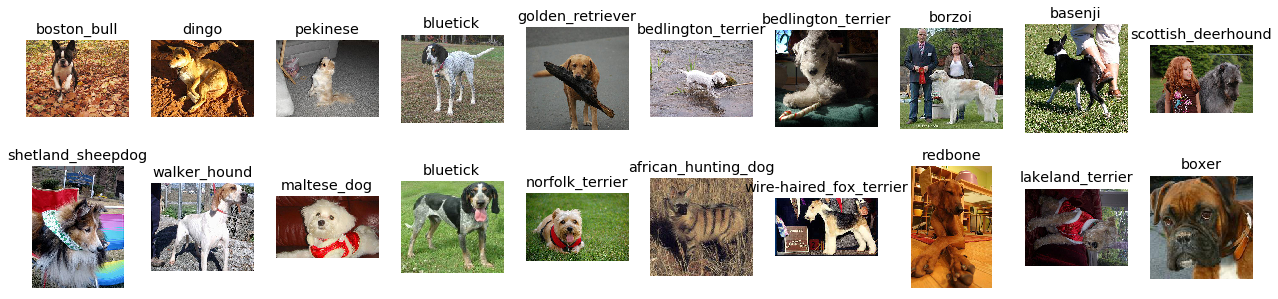

In [19]:
dataset = ReadData(dataframe=df, root_dir="./train")

# display images with their labels
fig = plt.figure(figsize=(22, 5))
for i, batch in enumerate(dataset):
    image, label = batch
    fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    plt.imshow(image)
    plt.title(breeds_processed_id2name[label])
    if i == 19:
        break

In [20]:
import torchvision.transforms as transforms

# transformations[includes data-augmentation] to apply on the training data 
transforms_train = transforms.Compose([
    transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
    transforms.Resize((255, 255)), 
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

# transformations[no data-augmentation] to apply on the validation data
transforms_val = transforms.Compose([
    transforms.Resize((255, 255)),
    transforms.ToTensor(),
])

In [21]:
# load the training data
train_dataset = ReadData(dataframe=df_train, root_dir="./train", 
                         transform=transforms_train)

# load the validation data
val_dataset = ReadData(dataframe=df_val, root_dir="./train",
                      transform=transforms_val)

# load the test data
test_dataset = ReadData(dataframe=df_test, root_dir="./train",
                      transform=transforms_val)

In [22]:
# create dataloaders
from torch.utils.data import DataLoader

# train dataloader
train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True, num_workers=4)
# validation dataloader
val_dl = DataLoader(val_dataset, batch_size=32, shuffle=True, pin_memory=True, num_workers=4) 
# test dataloader
test_dl = DataLoader(test_dataset, batch_size=32, shuffle=True, pin_memory=True, num_workers=4) 

In [23]:
def show_batch(batch):
    """Shows images in a batch of a dataloader"""
    images, labels = batch
    images = images.numpy()
    labels = labels.numpy()
    images = np.squeeze(images)
    fig = plt.figure(figsize=(22, 5))
    for i in range(20):
        ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
        ax.imshow(images[i].T)
        ax.set_title(breeds_processed_id2name[labels[i]])

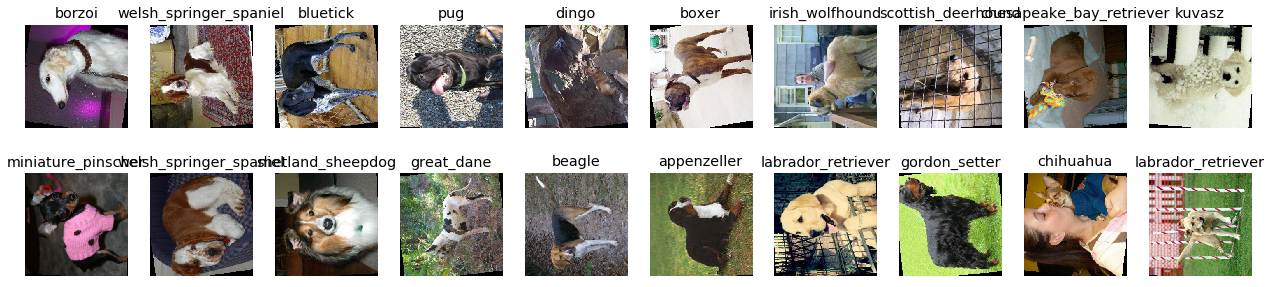

In [24]:
# view a batch of the train dataloader
for batch in train_dl:
    show_batch(batch)
    break

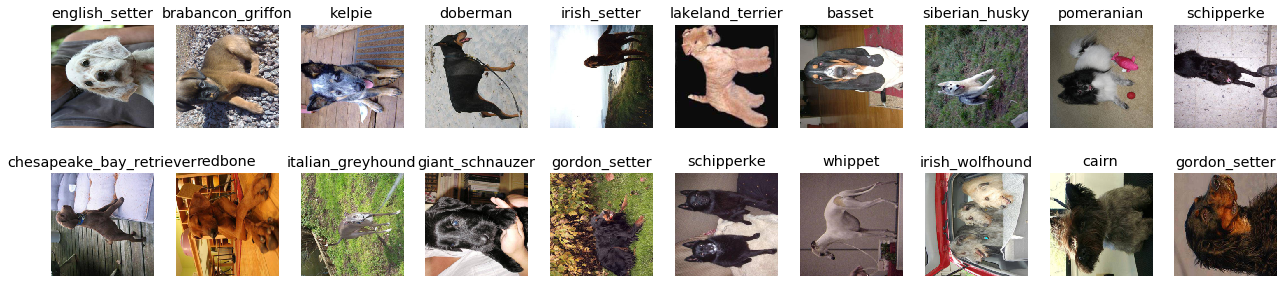

In [25]:
# view a batch of the val dataloader
for batch in val_dl:
    show_batch(batch)
    break

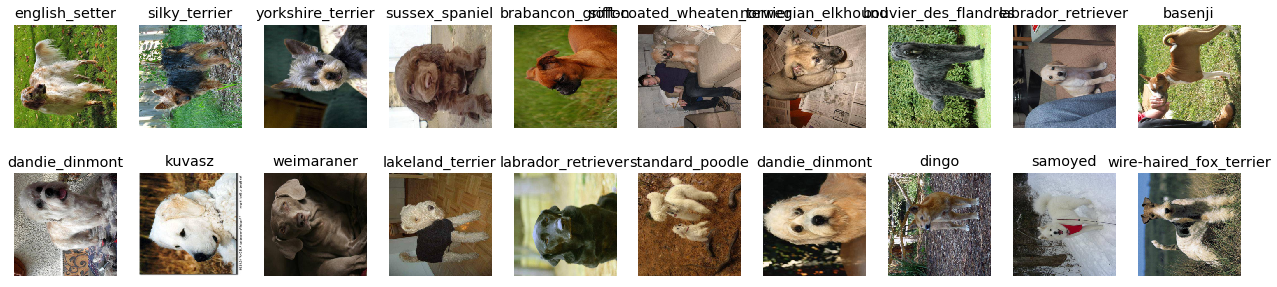

In [26]:
for batch in test_dl:
    show_batch(batch)
    break

In [40]:
! pip install jovian

In [27]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

In [47]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
!conda install -c conda-forge ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/suyash/anaconda3

  added / updated specs:
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    ipywidgets-7.5.1           |             py_0         101 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/linux-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda         

In [28]:
conv_base = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/suyash/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [29]:
print(conv_base)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [30]:
n_outs = conv_base.fc.out_features # store the output of the last layer in a variable
n_outs

1000

In [31]:
class Model(nn.Module):
    def __init__(self, base_model, output):
        super(Model, self).__init__()
        self.base_model = base_model
        self.output = output
        self.fc1 = nn.Linear(n_outs, 512)
        self.fc2 = nn.Linear(512, output)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, image):
        x = self.base_model(image)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        outs = self.fc2(x)
        return outs

In [32]:
output = len(df["breed"].unique())
output

120

In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [34]:
! pip install fastprogress

In [35]:
import time
from fastprogress.fastprogress import master_bar, progress_bar
from time import sleep

In [36]:
def accuracy(output, target):
    pred = output.data.max(1, keepdim=True)[1]
    # compare predictions to true label
    correct = np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
    return correct

In [37]:
def fit(model, train, validation, num_epochs, optimizer, criterion, stage=1):
    """Trains the given model and print train/ validation statistics"""
    since = time.time() # use to calculate time taken for the training process
    valid_loss_prev = np.Inf # keeps track of the running previous validation loss
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # get's current device

    
    # keep track of loos per epoch for train and validation
    history_train = []
    history_val = []
    mb = master_bar(range(1, num_epochs+1))
    
    for epoch in mb:
        train_loss = 0 # keeps track of train_loss
        valid_loss = 0 # keeps track of valid loss
        batch_acc =0 # keeps track of validation accuracy

        ####### Training Phase  ###########
        model.train()
        for batch in progress_bar(train, parent=mb):
            sleep(0.01)
            image, label = batch
            # transfer the data and models to current device
            image = image.to(device)
            label = label.to(device)
            model = model.to(device)
            
            # clear out the gradients
            optimizer.zero_grad()
            
            # forward pass : get the outputs from the model
            output = model(image).to(device)
            # calculate loss
            loss = criterion(output, label)
            # backward pass
            loss.backward()
            # optimization step
            optimizer.step()
            
            # update batch statistics
            train_loss += loss.item()*image.size(0)
            
        # update epoch statistics
        epoch_loss = train_loss / len(train.sampler)
        history_train.append(epoch_loss)
        
        ######## validation phase ########
        model.eval()
        for batch in progress_bar(validation, parent=mb):
            image, label = batch
            # transfer images and labels to cuda if avilable
            image = image.to(device)
            label = label.to(device)
            
            # model outputs
            output = model(image).to(device)
            # calculate loss and accuracy
            loss = criterion(output, label)
            score = accuracy(output, label)
            
            # update batch statistics
            valid_loss += loss.item()*image.size(0)
            batch_acc += score
            
        # update epoch statistics
        valid_epoch_loss = valid_loss/len(validation.sampler)
        valid_epoch_acc = batch_acc/len(validation.sampler)
        # display statistics
        mb.write(f"Epoch {epoch} - train loss: {epoch_loss:.5f} val loss: {valid_epoch_loss:.5f} acc: {valid_epoch_acc:.3f}")
        
        # save model if validation loss has decreased
        if valid_epoch_loss <= valid_loss_prev:
            torch.save(model.state_dict(), f"dog-breeds-resnet50-stage-{stage}.pt")
            save_epoch = epoch
            
        valid_loss_prev = valid_epoch_loss
        # append epoch_loss to history_train
        history_val.append(valid_epoch_loss)
        
    # print out total time taken
    time_elapsed = time.time() - since
    print(f"Model last saved at Epoch {save_epoch}")
    print(f"Training complete in {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s")
    
    # return the history_train and history_loss
    return {"train": history_train, "validation": history_val}

In [38]:
import torch.optim as optim

# freeze base model
for params in conv_base.parameters():
    params.requires_grad = False
    
# instantiate model
model = Model(base_model=conv_base, output=output)
print(model)

# specify loss and optimizer
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=1e-03) # we will start with a learning rate of 1e-03

Model(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
         

In [39]:
history = fit(model=model, train=train_dl, validation=val_dl, num_epochs=2, criterion=criterion, optimizer=optimizer, stage="tmp")

Model last saved at Epoch 2
Training complete in 67m 56s


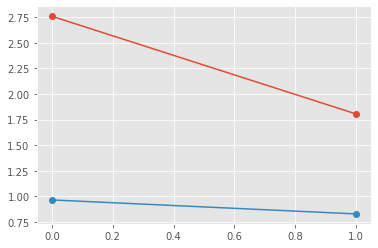

In [40]:
plt.plot(np.arange(0, 2, 1), history["train"], "-o")
plt.plot(np.arange(0, 2, 1), history["validation"], "-o")

In [42]:
# Re-instantiate the Model

# freeze base model
for params in conv_base.parameters():
    params.requires_grad = False
    
# instantiate model
model = Model(base_model=conv_base, output=output)

# specify loss and optimizer
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=1e-04)

# fit model
history = fit(model=model, train=train_dl, validation=val_dl,
              num_epochs=1, criterion=criterion,
              optimizer=optimizer, stage=1)

Model last saved at Epoch 1
Training complete in 35m 37s


In [43]:
def plot_learning_curves(logs, n_epochs):
    """Plots the learning curve for given logs"""
    plt.style.use("default")
    x_labels = np.arange(1, n_epochs+1, 1) # create our xlabels
    
    # create subplot
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    
    # ax1
    ax1.plot(x_labels, logs["train"], "-o", label="train loss")
    ax1.set_xlabel("# Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    # ax2
    ax2.plot(x_labels, logs["validation"], "-o", label="validation loss")
    ax2.set_xlabel("# Epochs")
    ax2.set_ylabel("Loss")
    ax2.legend()

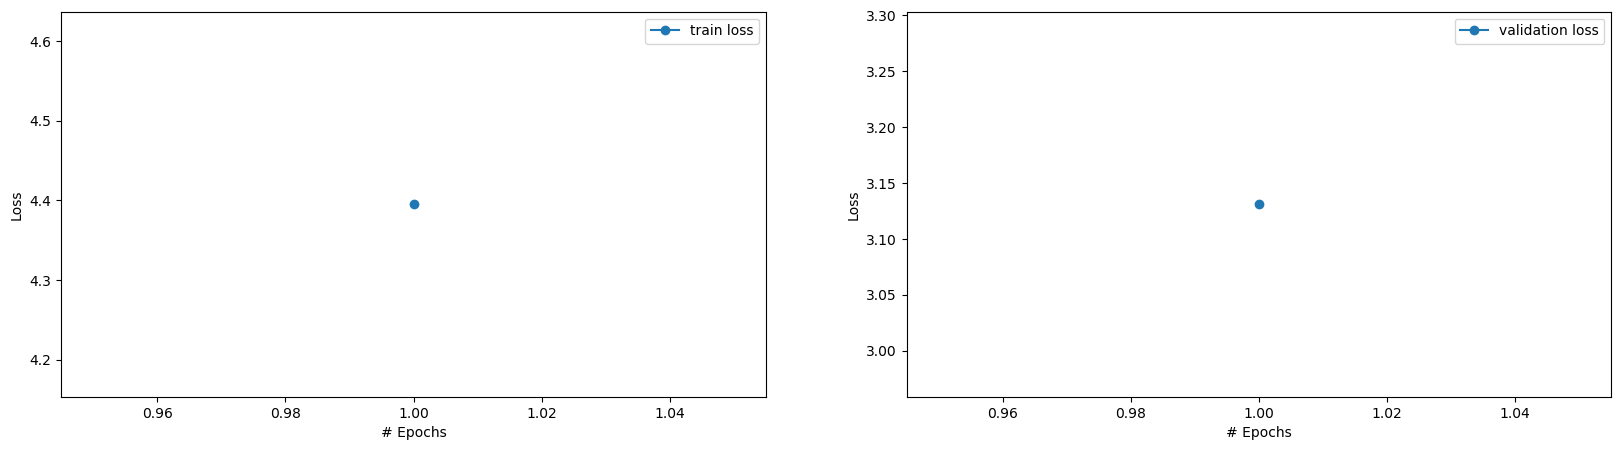

In [45]:
plot_learning_curves(history, 1)

In [46]:
# load in the best model
model.load_state_dict(torch.load("dog-breeds-resnet50-stage-1.pt"))

<All keys matched successfully>

In [47]:
def test(model, dataloader):
    """Prints accuracy on given dataloader"""
    # monitor accuracy
    batch_acc = 0
    
    # get current device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # get's current device
    
    # set model.eval()
    model.eval()
    for batch in (progress_bar(dataloader)):
        data , target = batch
        data, target = data.to(device), target.to(device)
        output = model(data)
        
        # get accuracy
        score = accuracy(output, target)
        
        # update batch statistics
        batch_acc += score
        
    # calculate accuracy
    accuracy_score = (batch_acc / len(dataloader.sampler)) * 100
    print(f"Accuracy : {accuracy_score:.3f} %")

In [48]:
test(model, dataloader=val_dl)


Accuracy : 47.410 %


In [49]:
test(model, dataloader=test_dl)

Accuracy : 49.022 %


In [ ]:
hyperparams = {
    'arch_name': 'resnet-50 pretrained',
    'lr': 1e-04
}
jovian.log_hyperparams(hyperparams)
jovian.commit(project="assigment05")

In [ ]:
# load in the best model
model.load_state_dict(torch.load("dog-breeds-resnet50-stage-1.pt"))
optimizer = optim.Adam(model.parameters(), lr=1e-04)

# fit model
history = fit(model=model, train=train_dl, validation=val_dl,num_epochs=1, criterion=criterion,optimizer=optimizer, stage=2)

In [ ]:
plot_learning_curves(history, 10)

In [ ]:
# load model
model.load_state_dict(torch.load("dog-breeds-resnet50-stage-2.pt"))
# Test accuracy
test(model, dataloader=test_dl)

In [ ]:

hyperparams = {
    'arch_name': 'resnet-50 pretrained',
    'lr': 1e-04
}

jovian.log_metrics(metrics)
jovian.log_hyperparams(hyperparams)
jovian.commit(project="assigment05")